<a href="https://colab.research.google.com/github/HJJunn/distribution_forecasting/blob/main/%EC%A0%84%EC%B2%98%EB%A6%AC_SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.dates as mdates
import seaborn as sns
import warnings
import datetime as dt
import plotly.express as px
import holidays
warnings.filterwarnings('ignore')

In [2]:
#한글 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
df = pd.read_csv("/content/drive/MyDrive/유통데이터/유통데이터.csv")

In [4]:
df

,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
0,2021-01-04,매출,37684,98,1,BX,3입,1,1.701008e+12,화장지 잘풀리는집 2겹<30롤*3>,비식품,화장지류,NaN
1,2021-01-04,매출,37544,95,1,BX,1입,4,1.880104e+13,맥심모카 210T<*4>XXX,식품,"커피,차류",NaN
2,2021-01-04,매출,37542,8,2,BX,12입,12,1.880104e+13,사조]해표식용유<1.8L>,식품,가공식품류,식용유
3,2021-01-04,매출,37542,8,1,BX,3팩*8,1,1.880475e+13,모나리자]콤비280매,비식품,화장지류,NaN
4,2021-01-04,매출,37542,8,3,BX,6입,6,8.801043e+12,농심]안성탕면컵<6入>,식품,"라면,통조림,상온즉석",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034460,2023-12-29,반품,37655,4,4,EA,1入,1,2.838022e+12,말통]공XXX,비식품,잡화,업소(잡화)
1034461,2023-12-29,반품,37791,2044,1,EA,15입,1,8.801045e+12,오뚜기]양념 돼지불고기<240g>,식품,가공식품류,"설탕,소금,조리료류"
1034462,2023-12-29,반품,37791,2044,1,EA,15입,1,8.801045e+12,오뚜기]소스 스테이크<290g>,식품,가공식품류,"설탕,소금,조리료류"
1034463,2023-12-29,반품,37791,2044,4,EA,40입,1,8.801045e+12,오뚜기]스프옥수수<80g>,식품,가공식품류,분말류등


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034465 entries, 0 to 1034464
Data columns (total 13 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   판매일           1034465 non-null  object 
 1   구분            1034465 non-null  object 
 2   우편번호          1034465 non-null  int64  
 3   매출처코드         1034465 non-null  int64  
 4   판매수량          1034465 non-null  int64  
 5   옵션코드          1034465 non-null  object 
 6   규격            1033707 non-null  object 
 7   입수            1034465 non-null  int64  
 8   상품 바코드(대한상의)  1032957 non-null  float64
 9   상품명           1034465 non-null  object 
 10  대분류           1033037 non-null  object 
 11  중분류           1031500 non-null  object 
 12  소분류           355241 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 102.6+ MB


In [6]:
#판매일 데이터 타입 바꿔주기
df['판매일']= pd.to_datetime(df['판매일'])

In [7]:
#판매일 기간 확인
print(df['판매일'].min(), df['판매일'].max())

2021-01-04 00:00:00 2023-12-29 00:00:00


In [8]:
#결측치 확인
df.isnull().sum()

,0
판매일,0
구분,0
우편번호,0
매출처코드,0
판매수량,0
옵션코드,0
규격,758
입수,0
상품 바코드(대한상의),1508
상품명,0


In [9]:
df.columns

Index(['판매일', '구분', '우편번호', '매출처코드', '판매수량', '옵션코드', '규격', '입수',
       '상품 바코드(대한상의)', '상품명', '대분류', '중분류', '소분류'],
      dtype='object')

In [10]:
#필요한 칼럼만 가져오기
columns = ['판매일', '구분', '판매수량', '옵션코드', '규격', '입수', '상품명', '대분류', '중분류']
df = df[columns]
df

,판매일,구분,판매수량,옵션코드,규격,입수,상품명,대분류,중분류
0,2021-01-04,매출,1,BX,3입,1,화장지 잘풀리는집 2겹<30롤*3>,비식품,화장지류
1,2021-01-04,매출,1,BX,1입,4,맥심모카 210T<*4>XXX,식품,"커피,차류"
2,2021-01-04,매출,2,BX,12입,12,사조]해표식용유<1.8L>,식품,가공식품류
3,2021-01-04,매출,1,BX,3팩*8,1,모나리자]콤비280매,비식품,화장지류
4,2021-01-04,매출,3,BX,6입,6,농심]안성탕면컵<6入>,식품,"라면,통조림,상온즉석"
...,...,...,...,...,...,...,...,...,...
1034460,2023-12-29,반품,4,EA,1入,1,말통]공XXX,비식품,잡화
1034461,2023-12-29,반품,1,EA,15입,1,오뚜기]양념 돼지불고기<240g>,식품,가공식품류
1034462,2023-12-29,반품,1,EA,15입,1,오뚜기]소스 스테이크<290g>,식품,가공식품류
1034463,2023-12-29,반품,4,EA,40입,1,오뚜기]스프옥수수<80g>,식품,가공식품류


In [11]:
# 옵션코드(BX, EA, CS)마다 입수가 다르므로 총 판매량으로 통일
# 총 판매량 = 판매 수량 * 입수

df['총 판매량'] = df['판매수량'] * df['입수']
df_total_sales = df.groupby(['판매일','구분', '중분류', '상품명'])['총 판매량'].sum().reset_index()
df_total_sales

,판매일,구분,중분류,상품명,총 판매량
0,2021-01-04,매출,가공식품류,간장 삼화 국<1.8*8>,1
1,2021-01-04,매출,가공식품류,간장 삼화 국<900*16>,17
2,2021-01-04,매출,가공식품류,간장 삼화 맛<900*16>,35
3,2021-01-04,매출,가공식품류,간장 삼화 진<1.8*8>,3
4,2021-01-04,매출,가공식품류,간장 삼화 진<900*16>,34
...,...,...,...,...,...
651592,2023-12-29,반품,양곡,외가집]쌀 4kg,1
651593,2023-12-29,반품,잡화,건전지]에너자이저맥스<D>케이스,6
651594,2023-12-29,반품,잡화,말통]공XXX,4
651595,2023-12-29,반품,잡화,잡-욕실]샤워<헤드/해바라기>,2


In [12]:
#데이터 타입 변경
df_total_sales['판매일']= pd.to_datetime(df_total_sales['판매일'])

#월, 주차, 요일 생성
df_total_sales['month'] = df_total_sales['판매일'].dt.month
df_total_sales['week'] = df_total_sales['판매일'].dt.isocalendar().week
df_total_sales['weekday'] = df_total_sales['판매일'].dt.weekday
df_total_sales['year'] = df_total_sales['판매일'].dt.year
df_total_sales

,판매일,구분,중분류,상품명,총 판매량,month,week,weekday,year
0,2021-01-04,매출,가공식품류,간장 삼화 국<1.8*8>,1,1,1,0,2021
1,2021-01-04,매출,가공식품류,간장 삼화 국<900*16>,17,1,1,0,2021
2,2021-01-04,매출,가공식품류,간장 삼화 맛<900*16>,35,1,1,0,2021
3,2021-01-04,매출,가공식품류,간장 삼화 진<1.8*8>,3,1,1,0,2021
4,2021-01-04,매출,가공식품류,간장 삼화 진<900*16>,34,1,1,0,2021
...,...,...,...,...,...,...,...,...,...
651592,2023-12-29,반품,양곡,외가집]쌀 4kg,1,12,52,4,2023
651593,2023-12-29,반품,잡화,건전지]에너자이저맥스<D>케이스,6,12,52,4,2023
651594,2023-12-29,반품,잡화,말통]공XXX,4,12,52,4,2023
651595,2023-12-29,반품,잡화,잡-욕실]샤워<헤드/해바라기>,2,12,52,4,2023


In [13]:
import holidays
holidays = holidays.KR(years=[2021,2022,2023])
holiday_dates = list(holidays.keys())

In [14]:
# 공휴일 날짜를 DataFrame으로 변환
holiday_df = pd.DataFrame({'date': holiday_dates})
holiday_df['date'] = pd.to_datetime(holiday_df['date'])
holiday_df = holiday_df.sort_values(by='date', ascending=True)

# 연도 및 주차 계산
holiday_df['year'] = holiday_df['date'].dt.year
holiday_df['week'] = holiday_df['date'].dt.isocalendar().week

holidays_week_2021 = holiday_df[holiday_df['year'] == 2021]
holidays_week_2021 = holidays_week_2021['week'].drop_duplicates().iloc[1:].tolist()
holidays_week_2022 = holiday_df[holiday_df['year'] == 2022]
holidays_week_2022 = holidays_week_2022['week'].drop_duplicates().iloc[1:].tolist()
holidays_week_2023 = holiday_df[holiday_df['year'] == 2023]
holidays_week_2023 = holidays_week_2023['week'].drop_duplicates().iloc[1:].tolist()
#연도별 공휴일이 포함된 주차
display(holidays_week_2021,holidays_week_2022,holidays_week_2023)

[6, 9, 18, 20, 22, 32, 33, 38, 39, 40, 41, 51]

[5, 9, 10, 18, 22, 23, 33, 36, 37, 40, 41, 51]

[3, 4, 9, 18, 21, 22, 23, 33, 39, 40, 41]

In [15]:
#공휴일을 1로 설정
df_total_sales['holidays'] = df_total_sales['판매일'].isin(holidays)
df_total_sales['holidays'] = df_total_sales['holidays'].apply(lambda x: 1 if x else 0)
df_total_sales[df_total_sales['holidays'] == 1]

,판매일,구분,중분류,상품명,총 판매량,month,week,weekday,year,holidays
23668,2021-02-11,매출,가공식품류,간장 삼화 맛<900*16>,4,2,6,3,2021,1
23669,2021-02-11,매출,가공식품류,감자전분<300g*30>,2,2,6,3,2021,1
23670,2021-02-11,매출,가공식품류,건어물)마른오징어(대),2,2,6,3,2021,1
23671,2021-02-11,매출,가공식품류,고구마전분<300g*30>,2,2,6,3,2021,1
23672,2021-02-11,매출,가공식품류,김 해스토리 가루<90g*1>,3,2,6,3,2021,1
...,...,...,...,...,...,...,...,...,...,...
598717,2023-09-28,매출,화장지류,크리넥스]키친타올안심<120*4+2>,8,9,39,3,2023,1
598718,2023-09-28,매출,화장지류,키친타올 내츄럴퓨어<100매*6>,96,9,39,3,2023,1
598719,2023-09-28,매출,화장지류,핸드타올4500매,9000,9,39,3,2023,1
598720,2023-09-28,반품,"과자,씨리얼,초코릿,빵류",포스트]그래놀라블루베리<310g>,3,9,39,3,2023,1


In [16]:
#주말 판매량
df_weekend = df_total_sales[df_total_sales['weekday'].isin([5,6])]
df_weekend['판매일'].value_counts()

,count
판매일,
2022-01-29,813
2023-01-21,504
2023-01-29,15


In [17]:
#주말 데이터 수가 적어 제거
weekend_dates = pd.to_datetime(['2022-01-29', '2023-01-21','2023-01-29'])
df_total_sales= df_total_sales[~df_total_sales['판매일'].isin(weekend_dates)]
df_total_sales

,판매일,구분,중분류,상품명,총 판매량,month,week,weekday,year,holidays
0,2021-01-04,매출,가공식품류,간장 삼화 국<1.8*8>,1,1,1,0,2021,0
1,2021-01-04,매출,가공식품류,간장 삼화 국<900*16>,17,1,1,0,2021,0
2,2021-01-04,매출,가공식품류,간장 삼화 맛<900*16>,35,1,1,0,2021,0
3,2021-01-04,매출,가공식품류,간장 삼화 진<1.8*8>,3,1,1,0,2021,0
4,2021-01-04,매출,가공식품류,간장 삼화 진<900*16>,34,1,1,0,2021,0
...,...,...,...,...,...,...,...,...,...,...
651592,2023-12-29,반품,양곡,외가집]쌀 4kg,1,12,52,4,2023,0
651593,2023-12-29,반품,잡화,건전지]에너자이저맥스<D>케이스,6,12,52,4,2023,0
651594,2023-12-29,반품,잡화,말통]공XXX,4,12,52,4,2023,0
651595,2023-12-29,반품,잡화,잡-욕실]샤워<헤드/해바라기>,2,12,52,4,2023,0


In [18]:
all_dates = pd.date_range(start=df_total_sales['판매일'].min(), end=df_total_sales['판매일'].max(), freq='D')
missing_dates = all_dates.difference(df_total_sales['판매일'])
missing_df = pd.DataFrame({'판매일': missing_dates})

missing_df['weekday'] = missing_df['판매일'].dt.weekday
missing_df['holidays'] = missing_df['판매일'].isin(holidays)
missing_df['holidays'] = missing_df['holidays'].apply(lambda x: 1 if x else 0)
missing_df

,판매일,weekday,holidays
0,2021-01-09,5,0
1,2021-01-10,6,0
2,2021-01-16,5,0
3,2021-01-17,6,0
4,2021-01-23,5,0
...,...,...,...
335,2023-12-16,5,0
336,2023-12-17,6,0
337,2023-12-23,5,0
338,2023-12-24,6,0


In [19]:
#누락된 날짜 중 주말이 아니거나 공휴일이 아닌 날짜 확인
missing_weekdays= missing_df[(missing_df['weekday'] < 5) & (missing_df['holidays'] == 0)]
missing_weekdays

,판매일,weekday,holidays
13,2021-02-18,3,0
160,2022-06-15,2,0
186,2022-09-06,1,0
202,2022-10-18,1,0
241,2023-02-22,2,0


In [20]:
#매출 데이터
df_sales= df_total_sales[df_total_sales['구분'] == '매출']
df_sales

,판매일,구분,중분류,상품명,총 판매량,month,week,weekday,year,holidays
0,2021-01-04,매출,가공식품류,간장 삼화 국<1.8*8>,1,1,1,0,2021,0
1,2021-01-04,매출,가공식품류,간장 삼화 국<900*16>,17,1,1,0,2021,0
2,2021-01-04,매출,가공식품류,간장 삼화 맛<900*16>,35,1,1,0,2021,0
3,2021-01-04,매출,가공식품류,간장 삼화 진<1.8*8>,3,1,1,0,2021,0
4,2021-01-04,매출,가공식품류,간장 삼화 진<900*16>,34,1,1,0,2021,0
...,...,...,...,...,...,...,...,...,...,...
651576,2023-12-29,매출,화장지류,화)라이너 순면롱40p 22244,2,12,52,4,2023,0
651577,2023-12-29,매출,화장지류,화)라이너 순면수퍼롱30p 23094,2,12,52,4,2023,0
651578,2023-12-29,매출,화장지류,화)라이너 일반48p 22243,2,12,52,4,2023,0
651579,2023-12-29,매출,화장지류,화)수퍼흡수 날소<23874>,3,12,52,4,2023,0


In [21]:
#반품 데이터
df_returns = df_total_sales[df_total_sales['구분'] == '반품']
df_returns

,판매일,구분,중분류,상품명,총 판매량,month,week,weekday,year,holidays
1084,2021-01-04,반품,가공식품류,오뚜기]들기름<320g>,5,1,1,0,2021,0
1085,2021-01-04,반품,"라면,통조림,상온즉석",농심]신라면멀티<120g>,80,1,1,0,2021,0
1086,2021-01-04,반품,"라면,통조림,상온즉석",삼양]불닭볶음큰컵치즈<105*16>,32,1,1,0,2021,0
1087,2021-01-04,반품,"생수,음료,건강",팔도]비락식혜캔<238ml>XXX,72,1,1,0,2021,0
1088,2021-01-04,반품,잡화,건전지 에너자이저 AA2 XXX,1,1,1,0,2021,0
...,...,...,...,...,...,...,...,...,...,...
651592,2023-12-29,반품,양곡,외가집]쌀 4kg,1,12,52,4,2023,0
651593,2023-12-29,반품,잡화,건전지]에너자이저맥스<D>케이스,6,12,52,4,2023,0
651594,2023-12-29,반품,잡화,말통]공XXX,4,12,52,4,2023,0
651595,2023-12-29,반품,잡화,잡-욕실]샤워<헤드/해바라기>,2,12,52,4,2023,0


In [22]:
sales_group = df_total_sales.groupby(['구분', 'weekday'])['총 판매량'].sum().reset_index()

In [23]:
fig = px.bar(sales_group, x='weekday', y='총 판매량', color='구분',
             title='요일별 매출과 반품의 판매량',
             labels={'weekday': '요일', '총 판매량': '판매량'})

fig.show()

In [24]:
# 반품량의 비율
(df_returns['총 판매량'].sum()/df_total_sales['총 판매량'].sum()).round(2)

0.03

In [25]:
# 주차 별 판매량
df_week_sales = df_sales.groupby(['year', 'week']).agg({ '총 판매량' : 'sum'}).reset_index()
df_week_sales

,year,week,총 판매량
0,2021,1,104067
1,2021,2,107832
2,2021,3,112624
3,2021,4,106899
4,2021,5,141615
...,...,...,...
151,2023,48,364729
152,2023,49,352753
153,2023,50,282369
154,2023,51,453247


In [26]:
fig1 = px.line(
    df_week_sales,
    x='week',
    y='총 판매량',
    color='year',  # 각 연도별로 구분
    title='주차별 총 판매량',
)
fig1.add_scatter(
    x=holidays_week_2021,  # 2021년 공휴일 포함 주차 리스트
    y=[df_week_sales[(df_week_sales['year'] == 2021) & (df_week_sales['week'] == week)]['총 판매량'].values[0] for week in holidays_week_2021],
    mode='markers',
    marker=dict(color='blue', size=5),
    name='2021 공휴일 포함',
)
fig1.add_scatter(
    x=holidays_week_2022,  # 2022년 공휴일 포함 주차 리스트
    y=[df_week_sales[(df_week_sales['year'] == 2022) & (df_week_sales['week'] == week)]['총 판매량'].values[0] for week in holidays_week_2022],
    mode='markers',
    marker=dict(color='red', size=5),
    name='2022 공휴일 포함',
)
fig1.add_scatter(
    x=holidays_week_2023,  # 2023년 공휴일 포함 주차 리스트
    y=[df_week_sales[(df_week_sales['year'] == 2023) & (df_week_sales['week'] == week)]['총 판매량'].values[0] for week in holidays_week_2023],
    mode='markers',
    marker=dict(color='green', size=5),
    name='2023 공휴일 포함',
)


# 그래프 출력
fig1.show()

In [27]:
#공휴일을 포함하고 있는 주차의 총 판매량
df_week_sales['holidays'] = 0

week_2021 = df_week_sales[df_week_sales['year'] == 2021]
week_2021.loc[df_week_sales['week'].isin(holidays_week_2021), 'holidays'] = 1
week_2022 = df_week_sales[df_week_sales['year'] == 2022]
week_2022.loc[df_week_sales['week'].isin(holidays_week_2022), 'holidays'] = 1
week_2023 = df_week_sales[df_week_sales['year'] == 2023]
week_2023.loc[df_week_sales['week'].isin(holidays_week_2023), 'holidays'] = 1

df_week_sales = pd.concat([week_2021, week_2022, week_2023])
df_week_sales['year_week'] = pd.to_datetime(df_week_sales['year'].astype(str) + df_week_sales['week'].astype(str).str.zfill(2) + '0', format='%Y%U%w')
df_week_sales

,year,week,총 판매량,holidays,year_week
0,2021,1,104067,0,2021-01-03
1,2021,2,107832,0,2021-01-10
2,2021,3,112624,0,2021-01-17
3,2021,4,106899,0,2021-01-24
4,2021,5,141615,0,2021-01-31
...,...,...,...,...,...
151,2023,48,364729,0,2023-11-26
152,2023,49,352753,0,2023-12-03
153,2023,50,282369,0,2023-12-10
154,2023,51,453247,0,2023-12-17


In [28]:
df_sales_명절= df_sales[df_sales['중분류'].str.contains('명절', na=False)]
df_sales_명절 = df_sales_명절.groupby('판매일')['총 판매량'].sum().reset_index()

df_sales_명절 = df_sales_명절[df_sales_명절['총 판매량'] > 200]
df_sales_명절_week = df_sales_명절['판매일'].tolist()
df_sales_명절

,판매일,총 판매량
2,2021-01-28,243
3,2021-01-29,393
4,2021-02-01,591
5,2021-02-02,579
6,2021-02-03,361
7,2021-02-04,321
8,2021-02-05,274
9,2021-02-08,296
10,2021-02-09,259
15,2021-03-02,462


In [29]:
# df_sales_명절_week에 포함된 날짜를 1로 설정
df_sales['명절'] = 0
df_sales.loc[df_sales['판매일'].isin(df_sales_명절_week), '명절'] = 1
df_sales

,판매일,구분,중분류,상품명,총 판매량,month,week,weekday,year,holidays,명절
0,2021-01-04,매출,가공식품류,간장 삼화 국<1.8*8>,1,1,1,0,2021,0,0
1,2021-01-04,매출,가공식품류,간장 삼화 국<900*16>,17,1,1,0,2021,0,0
2,2021-01-04,매출,가공식품류,간장 삼화 맛<900*16>,35,1,1,0,2021,0,0
3,2021-01-04,매출,가공식품류,간장 삼화 진<1.8*8>,3,1,1,0,2021,0,0
4,2021-01-04,매출,가공식품류,간장 삼화 진<900*16>,34,1,1,0,2021,0,0
...,...,...,...,...,...,...,...,...,...,...,...
651576,2023-12-29,매출,화장지류,화)라이너 순면롱40p 22244,2,12,52,4,2023,0,0
651577,2023-12-29,매출,화장지류,화)라이너 순면수퍼롱30p 23094,2,12,52,4,2023,0,0
651578,2023-12-29,매출,화장지류,화)라이너 일반48p 22243,2,12,52,4,2023,0,0
651579,2023-12-29,매출,화장지류,화)수퍼흡수 날소<23874>,3,12,52,4,2023,0,0


In [30]:
#피벗 형태로 변경
df_sales['year_week'] = pd.to_datetime(df_sales['year'].astype(str) + df_sales['week'].astype(str).str.zfill(2) + '0', format='%Y%U%w')

pivot_df_sales = df_sales.pivot_table(index=['year_week'], columns='중분류', values='총 판매량', aggfunc='sum', fill_value=0)
pivot_df_sales.reset_index(inplace=True)
pivot_df_sales

중분류,year_week,가공식품류,"과일,채소","과자,씨리얼,초코릿,빵류",기타,기타(비식품),기타(식품),"라면,통조림,상온즉석",명절세트(비식품),명절세트(식품),...,세제류,신선식품,양곡,"유제품,아이스크림등",잡화,주류,"축산,수산,건해산","커피,차류","헤어,바디,구강",화장지류
0,2021-01-03,5667,0,15485,0,0,0,26842,0,0,...,238,478,278,4,11985,0,213,3200,243,299
1,2021-01-10,5421,63,18395,0,0,0,26890,0,0,...,435,644,265,4,14029,0,432,1451,255,164
2,2021-01-17,4531,5,13867,0,0,0,30373,0,0,...,447,396,337,0,12040,0,275,1780,181,213
3,2021-01-24,6214,0,16262,0,0,0,27215,135,814,...,367,235,336,4,15914,0,207,1405,299,169
4,2021-01-31,8595,0,14568,0,0,0,36092,442,1684,...,446,191,371,0,13792,0,326,2467,257,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2023-11-26,3278,0,13079,0,0,5,36348,0,0,...,703,556,286,24,219059,0,574,1908,165,40988
152,2023-12-03,4012,0,13261,20,0,3,31603,0,0,...,1004,576,149,8,193709,0,717,2457,216,55950
153,2023-12-10,4051,0,13665,0,1,1,30773,0,0,...,815,680,185,0,136096,0,587,2590,317,42932
154,2023-12-17,4319,0,14651,0,20,201,42112,0,0,...,1317,837,381,0,269310,0,958,2545,352,65248


In [31]:
#공휴일, 명절 피처 추가
pivot_df_holidays= pd.merge(pivot_df_sales, df_sales[['year_week', 'holidays', '명절']], on='year_week', how='left')
pivot_df_holidays

,year_week,가공식품류,"과일,채소","과자,씨리얼,초코릿,빵류",기타,기타(비식품),기타(식품),"라면,통조림,상온즉석",명절세트(비식품),명절세트(식품),...,양곡,"유제품,아이스크림등",잡화,주류,"축산,수산,건해산","커피,차류","헤어,바디,구강",화장지류,holidays,명절
0,2021-01-03,5667,0,15485,0,0,0,26842,0,0,...,278,4,11985,0,213,3200,243,299,0,0
1,2021-01-03,5667,0,15485,0,0,0,26842,0,0,...,278,4,11985,0,213,3200,243,299,0,0
2,2021-01-03,5667,0,15485,0,0,0,26842,0,0,...,278,4,11985,0,213,3200,243,299,0,0
3,2021-01-03,5667,0,15485,0,0,0,26842,0,0,...,278,4,11985,0,213,3200,243,299,0,0
4,2021-01-03,5667,0,15485,0,0,0,26842,0,0,...,278,4,11985,0,213,3200,243,299,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626426,2023-12-24,3236,0,13376,0,0,0,32253,0,0,...,144,0,136948,0,619,1424,278,25734,0,0
626427,2023-12-24,3236,0,13376,0,0,0,32253,0,0,...,144,0,136948,0,619,1424,278,25734,0,0
626428,2023-12-24,3236,0,13376,0,0,0,32253,0,0,...,144,0,136948,0,619,1424,278,25734,0,0
626429,2023-12-24,3236,0,13376,0,0,0,32253,0,0,...,144,0,136948,0,619,1424,278,25734,0,0


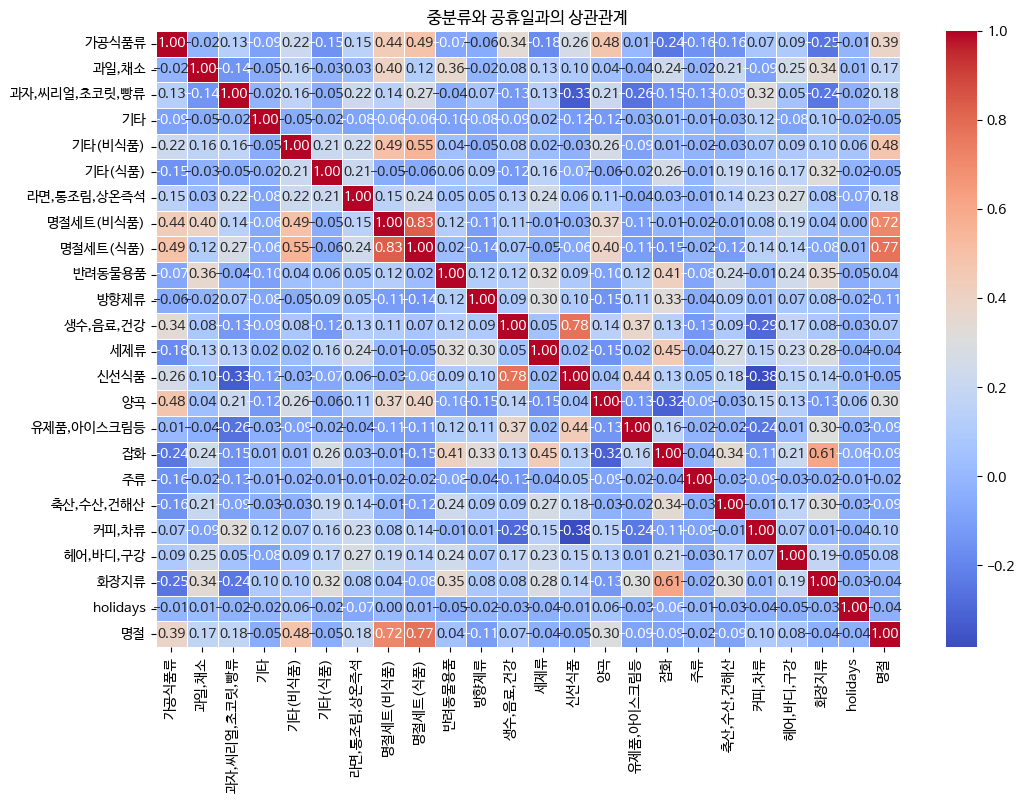

In [32]:

#중분류별 상관분석
categories_pivot_corr = pivot_df_holidays.drop(columns = ['year_week'])
corr_matrix = categories_pivot_corr.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('중분류와 공휴일과의 상관관계')
plt.show()

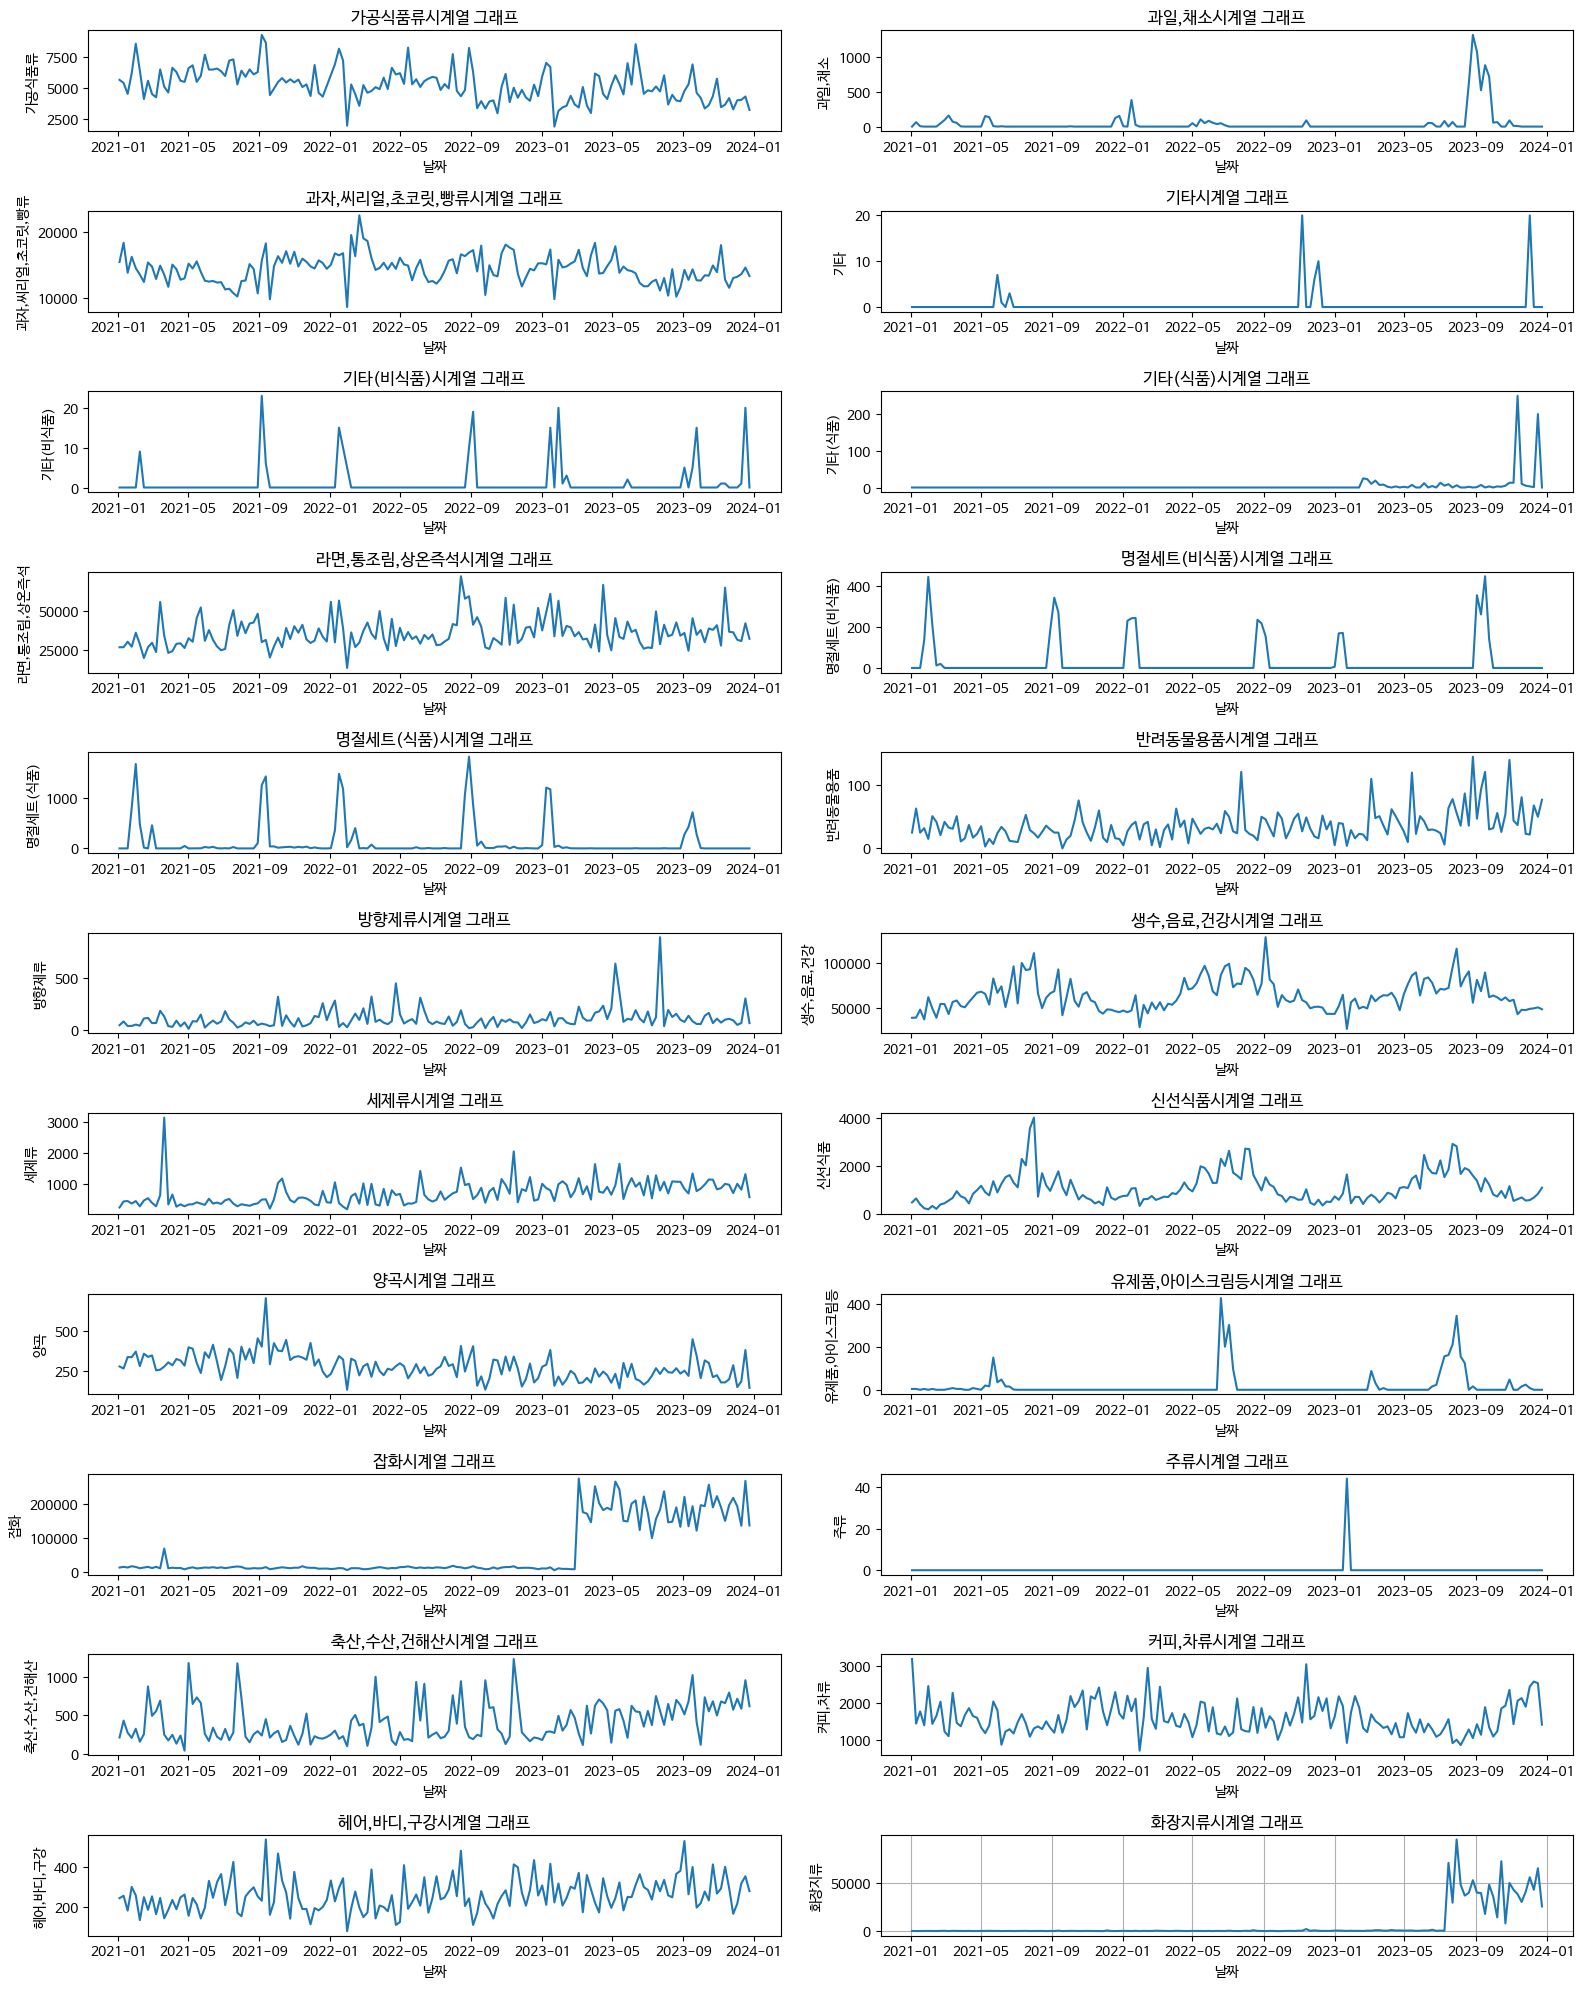

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 20))

for i, feature in enumerate(pivot_df_sales.columns[1:]):
    plt.subplot(11,2,i+1)
    plt.plot(pivot_df_sales['year_week'], pivot_df_sales[feature])
    plt.title(feature + '시계열 그래프')
    plt.xlabel('날짜')
    plt.ylabel(feature)

plt.tight_layout()
plt.grid(True)
plt.show()

In [34]:
df_sales_명절 = df_sales[df_sales['중분류'] == '명절세트(식품)']
df_sales_명절 = df_sales_명절.groupby('week')['총 판매량'].sum().reset_index()
df_sales_명절 = df_sales_명절[df_sales_명절['총 판매량'] > 1000]
df_sales_명절_week = df_sales_명절['week'].tolist()
df_sales_명절

,week,총 판매량
1,2,1575
2,3,2666
3,4,2031
4,5,1762
21,34,1086
22,35,1932
23,36,2416
24,37,1920


In [35]:
df_sales.groupby('중분류')['총 판매량'].sum().sort_values(ascending=False)

,총 판매량
중분류,
"생수,음료,건강",9979972
잡화,9346670
"라면,통조림,상온즉석",5612726
"과자,씨리얼,초코릿,빵류",2253831
화장지류,1093897
가공식품류,822580
"커피,차류",250014
신선식품,169636
세제류,109012


In [36]:
df_sales

,판매일,구분,중분류,상품명,총 판매량,month,week,weekday,year,holidays,명절,year_week
0,2021-01-04,매출,가공식품류,간장 삼화 국<1.8*8>,1,1,1,0,2021,0,0,2021-01-03
1,2021-01-04,매출,가공식품류,간장 삼화 국<900*16>,17,1,1,0,2021,0,0,2021-01-03
2,2021-01-04,매출,가공식품류,간장 삼화 맛<900*16>,35,1,1,0,2021,0,0,2021-01-03
3,2021-01-04,매출,가공식품류,간장 삼화 진<1.8*8>,3,1,1,0,2021,0,0,2021-01-03
4,2021-01-04,매출,가공식품류,간장 삼화 진<900*16>,34,1,1,0,2021,0,0,2021-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...
651576,2023-12-29,매출,화장지류,화)라이너 순면롱40p 22244,2,12,52,4,2023,0,0,2023-12-24
651577,2023-12-29,매출,화장지류,화)라이너 순면수퍼롱30p 23094,2,12,52,4,2023,0,0,2023-12-24
651578,2023-12-29,매출,화장지류,화)라이너 일반48p 22243,2,12,52,4,2023,0,0,2023-12-24
651579,2023-12-29,매출,화장지류,화)수퍼흡수 날소<23874>,3,12,52,4,2023,0,0,2023-12-24


In [37]:
#선정된 품목
selected_categories = ['생수,음료,건강', '라면,통조림,상온즉석', '과자,씨리얼,초코릿,빵류', '가공식품류', '커피,차류', '신선식품']
df_selected = df_sales[df_sales['중분류'].isin(selected_categories)]

In [38]:
df_selected_group = df_selected.groupby(['중분류', 'week', 'month','year_week'])['총 판매량'].sum().reset_index()
df_selected_group = df_selected_group.sort_values(by='year_week', ascending=True).reset_index(drop = True)

In [39]:
pivot_df_selected = df_selected.pivot_table(
    index=['year_week'],  # 행: year_week, month, week
    columns='중분류',                      # 열: 중분류
    values='총 판매량',                    # 값: 총 판매량
    aggfunc='sum',                         # 집계 함수: 합계
    fill_value=0                           # NaN 값을 0으로 채움
).reset_index()

df_day = df_selected.groupby('year_week')[['month', 'week']].first().reset_index()
pivot_df_selected = pivot_df_selected.reset_index().merge(df_day, on='year_week').drop(columns=['index'])

pivot_df_selected

,year_week,가공식품류,"과자,씨리얼,초코릿,빵류","라면,통조림,상온즉석","생수,음료,건강",신선식품,"커피,차류",month,week
0,2021-01-03,5667,15485,26842,39061,478,3200,1,1
1,2021-01-10,5421,18395,26890,39236,644,1451,1,2
2,2021-01-17,4531,13867,30373,48113,396,1780,1,3
3,2021-01-24,6214,16262,27215,37249,235,1405,1,4
4,2021-01-31,8595,14568,36092,62017,191,2467,2,5
...,...,...,...,...,...,...,...,...,...
151,2023-11-26,3278,13079,36348,47638,556,1908,11,48
152,2023-12-03,4012,13261,31603,48994,576,2457,12,49
153,2023-12-10,4051,13665,30773,49538,680,2590,12,50
154,2023-12-17,4319,14651,42112,50642,837,2545,12,51


In [40]:
pivot_df_selected.to_csv('pivot_df_selected.csv', index=False)

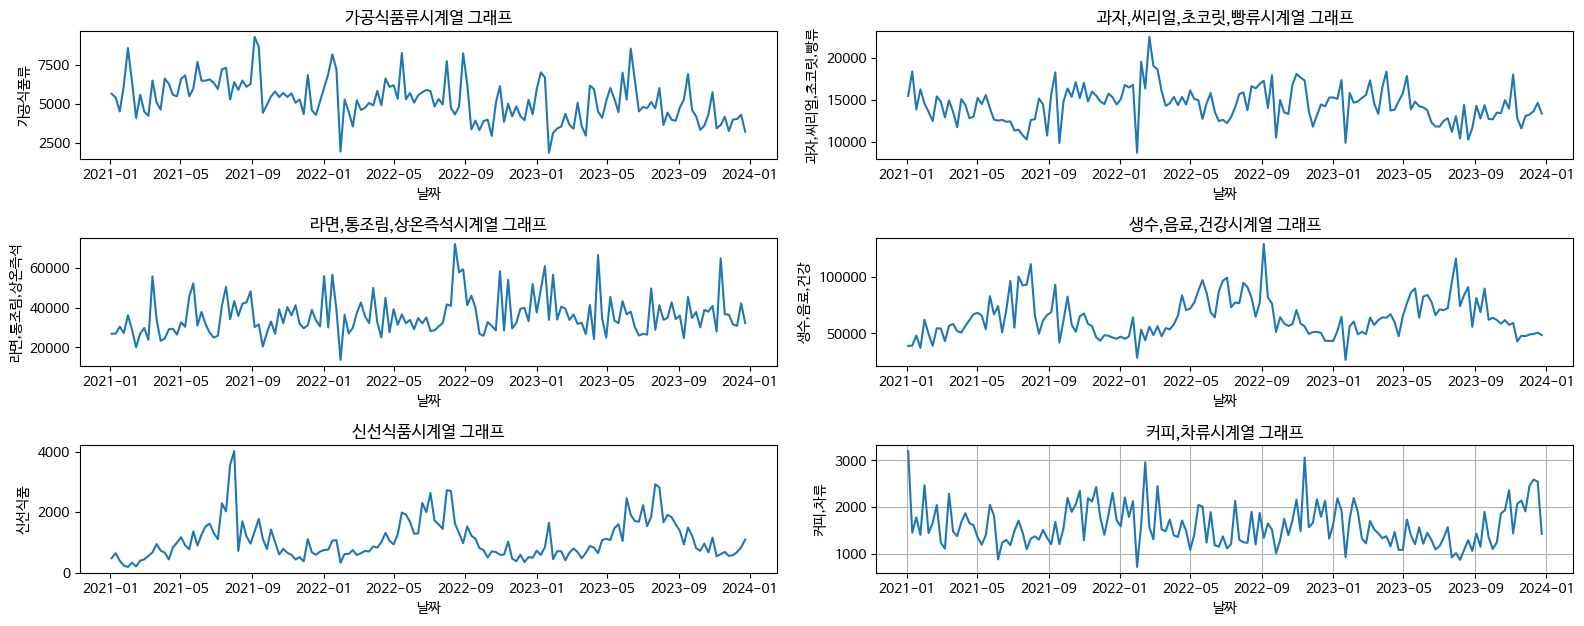

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

for i, feature in enumerate(pivot_df_selected.columns[1:-2]):
    plt.subplot(4,2,i+1)
    plt.plot(pivot_df_selected['year_week'], pivot_df_selected[feature])
    plt.title(feature + '시계열 그래프')
    plt.xlabel('날짜')
    plt.ylabel(feature)

plt.tight_layout()
plt.grid(True)
plt.show()

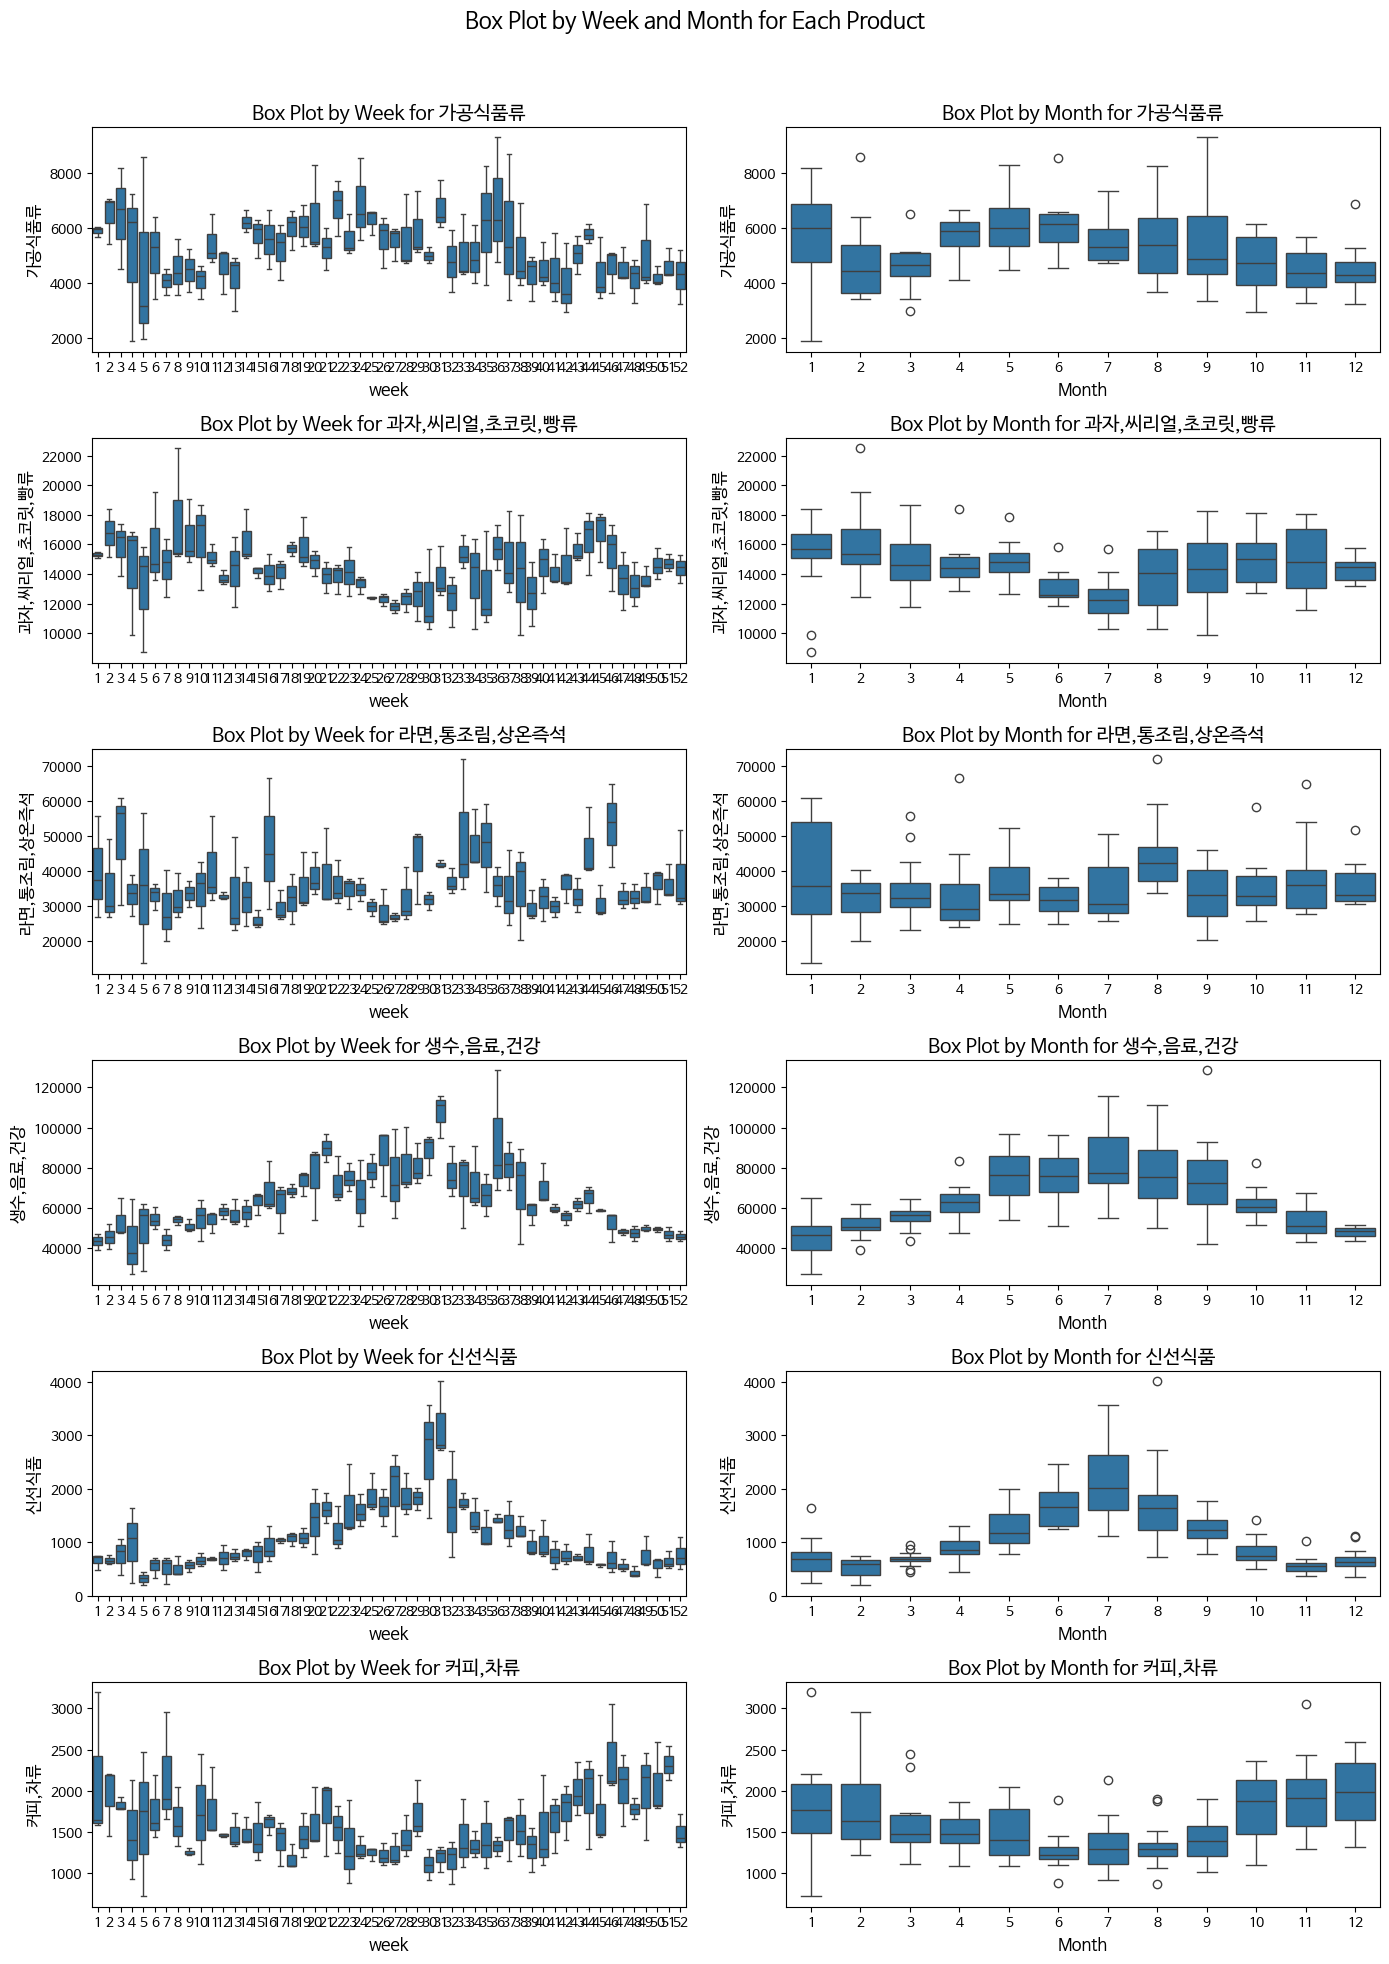

In [42]:
# 품목 목록
item_selected_list = pivot_df_selected.columns[1:-2]

fig, axes = plt.subplots(6, 2, figsize=(14, 20))  # 6x2 배열의 서브플롯
plt.suptitle('Box Plot by Week and Month for Each Product', fontsize=16)

# 각 품목에 대해 주별 및 월별 박스플롯을 그리기
for i, item_selected in enumerate(item_selected_list):
    # 주별 Box Plot
    sns.boxplot(x='week', y=item_selected, data=pivot_df_selected, ax=axes[i, 0])
    axes[i, 0].set_title(f'Box Plot by Week for {item_selected}', fontsize=14)
    axes[i, 0].set_xlabel('week', fontsize=12)
    axes[i, 0].set_ylabel(item_selected, fontsize=12)

    # 월별 Box Plot
    sns.boxplot(x='month', y=item_selected, data=pivot_df_selected, ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot by Month for {item_selected}', fontsize=14)
    axes[i, 1].set_xlabel('Month', fontsize=12)
    axes[i, 1].set_ylabel(item_selected, fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # 타이틀과 서브플롯 간의 간격 조정
plt.show()

In [73]:
pivot_df_selected_라면_w = pivot_df_selected[['year_week', '라면,통조림,상온즉석']]
pivot_df_selected_라면_w = pivot_df_selected_라면_w.set_index('year_week')

In [87]:
pip install statsmodels

In [100]:
# 1차 차분
pivot_df_selected_라면 = pivot_df_selected_라면_w.copy()
pivot_df_selected_라면['라면,통조림,상온즉석_diff'] = pivot_df_selected_라면['라면,통조림,상온즉석'].diff()
pivot_df_selected_라면.drop(columns=['라면,통조림,상온즉석'], inplace=True)
pivot_df_selected_라면.dropna(inplace = True)


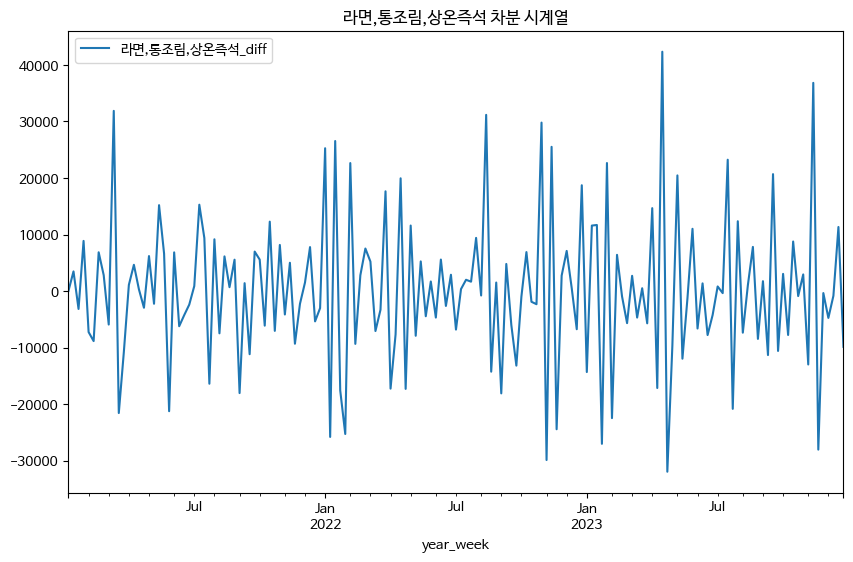

ADF Statistic: -6.353767563266265
p-value: 2.572626421946344e-08


In [101]:
from statsmodels.tsa.stattools import adfuller


# 차분된 시계열 시각화
pivot_df_selected_라면.plot(figsize=(10, 6))
plt.title('라면,통조림,상온즉석 차분 시계열')
plt.show()

# 차분 후 정상성 검증 (ADF 또는 KPSS 검정)
result_diff = adfuller(pivot_df_selected_라면)
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])

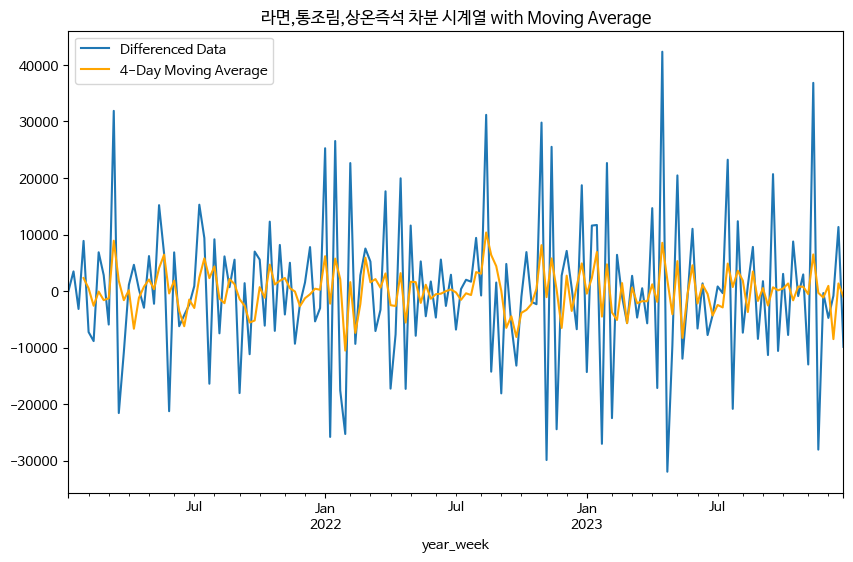

In [102]:
window_size = 4  # 이동평균 창의 크기
moving_average = pivot_df_selected_라면['라면,통조림,상온즉석_diff'].rolling(window=window_size).mean()

# 그래프 그리기
plt.figure(figsize=(10, 6))
pivot_df_selected_라면['라면,통조림,상온즉석_diff'].plot(label='Differenced Data')
moving_average.plot(label=f'{window_size}-Day Moving Average', color='orange')
plt.title('라면,통조림,상온즉석 차분 시계열 with Moving Average')
plt.legend()
plt.show()

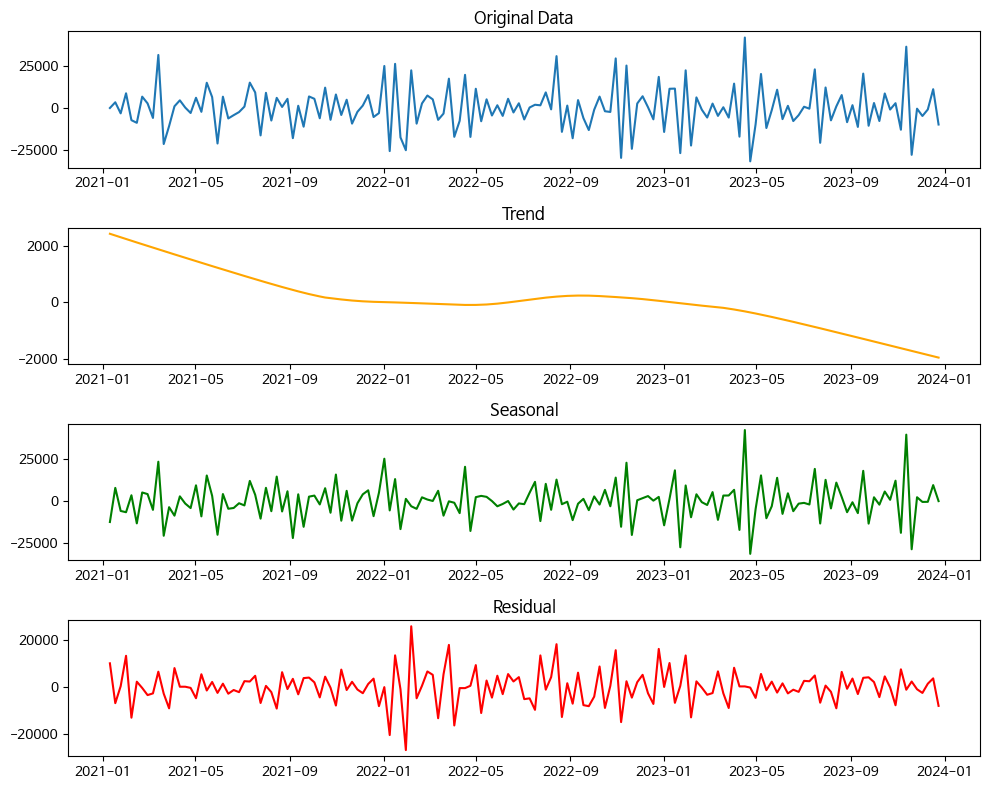

In [103]:
from statsmodels.tsa.seasonal import STL


# STL 분해
stl = STL(pivot_df_selected_라면, seasonal=53)  # seasonal: 계절성 주기 (13일, 7일, 월별 등 설정)
result = stl.fit()

# 분해된 결과
seasonal = result.seasonal  # 계절성
trend = result.trend  # 추세
residual = result.resid  # 잔차

# 계절성 분해 결과 시각화
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(pivot_df_selected_라면, label='Original Data')
plt.title('Original Data')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal', color='green')
plt.title('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual', color='red')
plt.title('Residual')

plt.tight_layout()
plt.show()


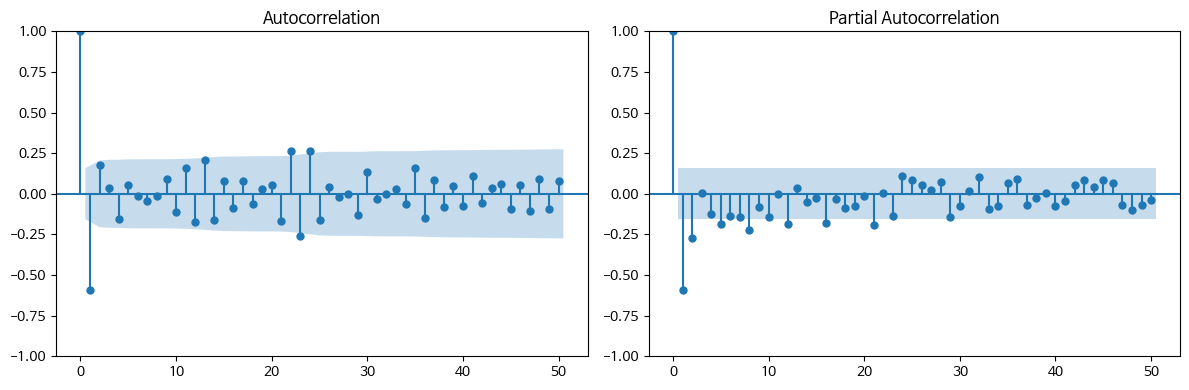

In [104]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2 ,figsize = (12, 4))

# 시계열 데이터 ACF 플롯
plot_acf(pivot_df_selected_라면, lags=50, ax=ax[0])  # 50개의 래그까지 확인
plot_pacf(pivot_df_selected_라면, lags=50, ax=ax[1])

plt.tight_layout()

In [105]:
from statsmodels.tsa.stattools import acf, pacf

acf_values = acf(pivot_df_selected_라면, nlags=50)
pacf_values = pacf(pivot_df_selected_라면, nlags=50)

# 신뢰 구간 계산 (95% 신뢰 구간)
confidence_interval = 1.96 / np.sqrt(len(pivot_df_selected_라면))

q_param = []
for lag, value in enumerate(acf_values):
    if np.abs(value) > confidence_interval:
        q_param.append(lag)

p_param = []
for lag, value in enumerate(pacf_values):
    if np.abs(value) > confidence_interval:
        p_param.append(lag)


display(f"Q parameters of MA model is {q_param},  P of AR model is {p_param}")

'Q parameters of MA model is [0, 1, 2, 11, 12, 13, 14, 21, 22, 23, 24, 25],  P of AR model is [0, 1, 2, 5, 8, 10, 12, 16, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35, 36, 42, 43, 44, 45, 46, 47, 48, 49, 50]'

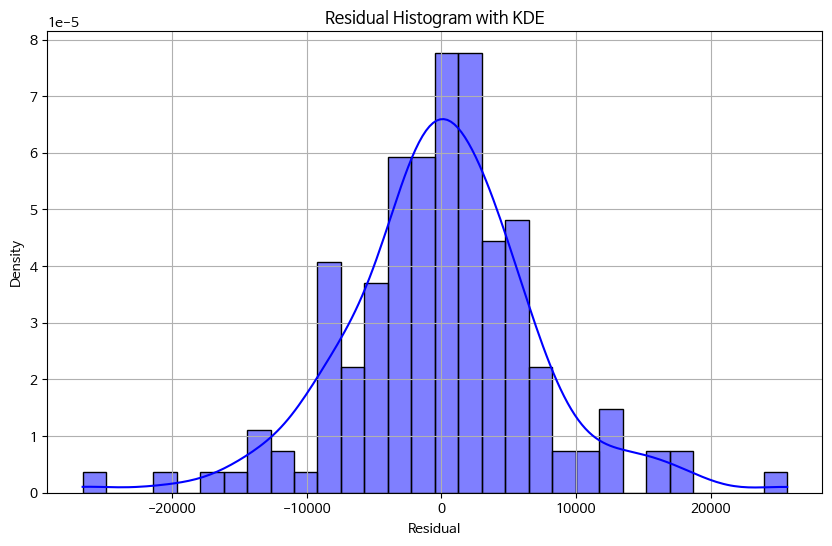

In [106]:
plt.figure(figsize=(10, 6))
sns.histplot(residual, kde=True, bins=30, color='blue', stat='density')  # KDE(커널 밀도 추정)로 정규분포 커브 그리기
plt.title('Residual Histogram with KDE')
plt.xlabel('Residual')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [107]:
# ADF 검정
adf_result = adfuller(residual)  # NaN 값 제거 후 검사
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
# 정상성 여부 판단

if adf_result[1] < 0.05:
    print("정상성을 만족합니다.")
else:
    print("정상성을 만족하지 못합니다.")

ADF Statistic: -14.594634167588003
p-value: 4.260031748238546e-27
정상성을 만족합니다.


In [108]:
!pip install pmdarima

In [109]:

from pmdarima import auto_arima
from pmdarima.arima import ndiffs, nsdiffs

print(f"Suggested # of differences (ADF): {ndiffs(pivot_df_selected_라면, test='adf')}")
print(f"Suggested # of differences (OSCB): {nsdiffs(pivot_df_selected_라면, m=52, test='ocsb')}")
print(f"Suggested # of differences (CH): {nsdiffs(pivot_df_selected_라면, m=52, test='ch')}")

Suggested # of differences (ADF): 0
Suggested # of differences (OSCB): 0
Suggested # of differences (CH): 1


In [110]:
test_start_date = '2023-06-01'
test_data = pivot_df_selected_라면_o[(pivot_df_selected_라면_o.index >= test_start_date)]
train_data = pivot_df_selected_라면_o[(pivot_df_selected_라면_o.index < test_start_date) & (pivot_df_selected_라면_o.index >= '2021-01-10')]

# 차분된 데이터로 분할
train_data_diff = pivot_df_selected_라면[pivot_df_selected_라면.index < test_start_date]
test_data_diff =  pivot_df_selected_라면[pivot_df_selected_라면.index >= test_start_date]

In [111]:
train_data

,"라면,통조림,상온즉석"
year_week,
2021-01-10,26890
2021-01-17,30373
2021-01-24,27215
2021-01-31,36092
2021-02-07,28849
...,...
2023-04-30,24915
2023-05-07,45374
2023-05-14,33421


In [112]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# SARIMA 모델 정의
model = SARIMAX(train_data_diff, order=(2, 1, 2), seasonal_order=(0, 1, 1, 52))  # 계절 주기는 52주
sarima_model = model.fit(disp=False)

# 학습 결과 요약
print(sarima_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



                                      SARIMAX Results                                       
Dep. Variable:                     라면,통조림,상온즉석_diff   No. Observations:                  125
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 52)   Log Likelihood                -783.345
Date:                              Fri, 13 Dec 2024   AIC                           1578.689
Time:                                      18:39:19   BIC                           1592.349
Sample:                                  01-10-2021   HQIC                          1584.127
                                       - 05-28-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0163      0.482     -2.107      0.035      -1.962      -0.071
ar.L2         -0.52

In [113]:
pred = sarima_model.get_forecast(steps=len(test_data_diff))
pred_mean = pred.predicted_mean  # 예측 값
pred_ci = pred.conf_int()  # 신뢰 구간

# 결과 확인
print("Predicted Values:", pred_mean)

Predicted Values: 2023-06-04   -15357.258193
2023-06-11     7122.684374
2023-06-18    -1346.718400
2023-06-25    -4144.459413
2023-07-02      746.562982
2023-07-09     2849.988731
2023-07-16     3136.080644
2023-07-23    -2687.369909
2023-07-30     6176.050132
2023-08-06    -2282.764442
2023-08-13    17593.643771
2023-08-20    -7622.535734
2023-08-27     2449.794245
2023-09-03   -14810.155280
2023-09-10     2499.013332
2023-09-17    -6460.635348
2023-09-24    -5007.087746
2023-10-01      906.103222
2023-10-08     1533.993040
2023-10-15     2366.928129
2023-10-22    -3370.462832
2023-10-29    17296.609651
2023-11-05   -16598.365964
2023-11-12    14257.875989
2023-11-19   -15384.339340
2023-11-26      506.801905
2023-12-03     3963.282381
2023-12-10     2103.667585
2023-12-17    -4996.807476
2023-12-24     8474.554307
Freq: W-SUN, Name: predicted_mean, dtype: float64


In [114]:
# 훈련 데이터의 마지막 차분 값 (차분된 데이터에서 마지막 값)
last_value = pivot_df_selected_라면_o[(pivot_df_selected_라면_o.index < test_start_date)].iloc[-1][0]
# 예측된 차분 값 (차분된 예측 값)
pred_diff_values = pred_mean  # 예측된 차분 값

# 예측된 차분 값을 원본 시계열 값으로 복원
restored_pred_values =pred_diff_values.cumsum() + last_value  # 차분을 역으로 누적하여 복원

# 예측 결과 출력
print("Restored Predicted Values:", restored_pred_values)

Restored Predicted Values: 2023-06-04    27832.741807
2023-06-11    34955.426181
2023-06-18    33608.707781
2023-06-25    29464.248367
2023-07-02    30210.811349
2023-07-09    33060.800081
2023-07-16    36196.880725
2023-07-23    33509.510816
2023-07-30    39685.560948
2023-08-06    37402.796506
2023-08-13    54996.440278
2023-08-20    47373.904544
2023-08-27    49823.698789
2023-09-03    35013.543509
2023-09-10    37512.556841
2023-09-17    31051.921492
2023-09-24    26044.833747
2023-10-01    26950.936969
2023-10-08    28484.930009
2023-10-15    30851.858138
2023-10-22    27481.395306
2023-10-29    44778.004957
2023-11-05    28179.638993
2023-11-12    42437.514982
2023-11-19    27053.175642
2023-11-26    27559.977547
2023-12-03    31523.259927
2023-12-10    33626.927512
2023-12-17    28630.120036
2023-12-24    37104.674343
Freq: W-SUN, Name: predicted_mean, dtype: float64


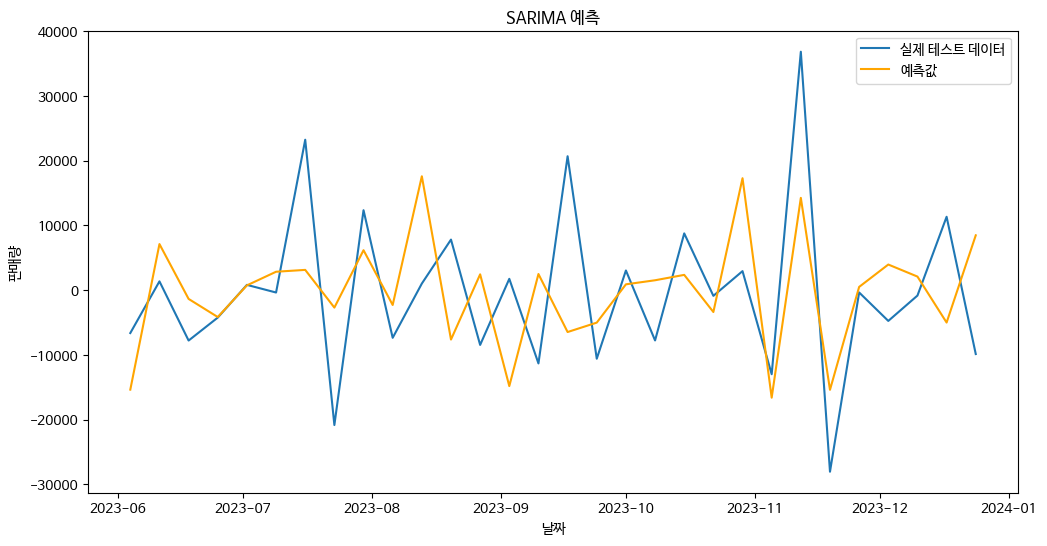

In [115]:
plt.figure(figsize=(12, 6))
plt.plot(test_data_diff.index, test_data_diff, label='실제 테스트 데이터')
plt.plot(test_data_diff.index, pred_mean, label='예측값', color='orange')
plt.legend()
plt.title('SARIMA 예측')
plt.xlabel('날짜')
plt.ylabel('판매량')
plt.show()

In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 예측값과 실제값 비교 (복원된 예측값과 실제 데이터)
y_true = test_data_diff # 실제 데이터 (원본 데이터)
y_pred = pred_mean # 복원된 예측값

# 성능 지표 계산
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"MAE (Mean Absolute Error): {mae}")
print(f"MSE (Mean Squared Error): {mse}")
print(f"R^2 (R squared): {r2}")

MAE (Mean Absolute Error): 10015.897126708633
MSE (Mean Squared Error): 151254070.1004324
R^2 (R squared): 0.058787417673728526


In [62]:
import itertools
def sarima_aic_bic_search(data, p_range, d_range, q_range, P_range, D_range, Q_range, seasonal_period):
    # 가능한 파라미터 조합 생성
    pdq = list(itertools.product(p_range, d_range, q_range))
    seasonal_pdq = list(itertools.product(P_range, D_range, Q_range, [seasonal_period]))

    # 결과 저장용 리스트
    results = []

    for param in pdq:
        for seasonal_param in seasonal_pdq:
            try:
                # SARIMA 모델 생성 및 학습
                model = SARIMAX(data,
                                order=param,
                                seasonal_order=seasonal_param,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
                results_model = model.fit(disp=False)

                # 결과 저장 (AIC, BIC 포함)
                results.append({
                    'order': param,
                    'seasonal_order': seasonal_param,
                    'aic': results_model.aic,
                    'bic': results_model.bic
                })
            except Exception as e:
                # 예외가 발생한 경우 무시하고 진행
                continue

    # 결과를 데이터프레임으로 변환
    results_df = pd.DataFrame(results)
    return results_df


In [63]:
# # 데이터 준비
# data = pivot_df_selected_라면  # 주간 데이터 사용 (반드시 정상성 확인)

# # Grid Search 파라미터 범위 정의
# p = range(0, 4)   # AR 차수
# d = range(0, 1)   # 차분 차수
# q = range(0, 4)   # MA 차수
# P = range(0, 2)   # 계절 AR 차수
# D = range(0, 2)   # 계절 차분 차수
# Q = range(0, 2)   # 계절 MA 차수
# s = 52           # 계절 주기 (주간 데이터이므로 52주)

# # Grid Search 실행
# results = sarima_aic_bic_search(data, p, d, q, P, D, Q, s)


In [64]:
# results_sorted = results.sort_values('aic')
# print("Top 5 Models Based on AIC:")
# print(results_sorted.head())

# # 최적의 AIC를 가진 모델
# best_aic_model = results_sorted.iloc[0]
# print(f"Best Model Based on AIC: {best_aic_model}")

# # BIC 기준으로 정렬 (원하는 경우)
# results_sorted_bic = results.sort_values('bic')
# print("Top 5 Models Based on BIC:")
# print(results_sorted_bic.head())



```
top_models_dict = {
    'models': [
        {'order': (2, 1, 2), 'seasonal_order': (0, 1, 1, 52), 'aic': 1022.739976, 'bic': 1033.840862},
        {'order': (2, 1, 2), 'seasonal_order': (1, 1, 1, 52), 'aic': 1024.736017, 'bic': 1037.687050},
        {'order': (0, 1, 2), 'seasonal_order': (0, 1, 1, 52), 'aic': 1028.983939, 'bic': 1036.384530},
        {'order': (1, 1, 2), 'seasonal_order': (0, 1, 1, 52), 'aic': 1029.026748, 'bic': 1038.277486},
        {'order': (0, 1, 2), 'seasonal_order': (1, 1, 1, 52), 'aic': 1030.982142, 'bic': 1040.232880}
    ]
}
```

